In [1]:
import qim3d

# Local thickness notebook

This notebook shows an example of how to determine the **local thickness** of an object in either 2D and 3D using the `qim3d` library. The local thickness at a point within the object is defined as the radius of the largest circle (2D) or sphere (3D) that contains the point and is inside the object. 

In the following, the local thickness is computed for three examples:

* **Example 1**: 2D image of blobs 
* **Example 2**: 3D volume of shell 
* **Example 3**: 3D volume of cement

The local thickness algorithm is applied by using the `qim3d.processing.local_thickness` function, which expects a binary image/volume. If the input is not already binary, then it will be binarized automatically using Otsu's thresholding method. The `qim3d.processing.local_thickness` function returns a 2D or 3D Numpy array representing the local thickness of the input image/volume.


#### **Example 1**: Local thickness of 2D image
This example uses a 2D image of blobs (256 x 256), which can be acquired from `qim3d.examples.blobs_256x256`.

In [ ]:
# Import 2D image of blobs
img = qim3d.examples.blobs_256x256

# Compute the local thickness of the blobs
lt_img = qim3d.processing.local_thickness(img, visualize = True)

AttributeError: module 'qim3d.examples' has no attribute 'blobs_256x256'

#### **Example 2**: Local thickness of 3D volume
This example uses a 3D volume of a shell (225 x 128 x 128), which can be acquired from `qim3d.examples.shell_225x128x128`.

In [13]:
# Import 3D volume of shell
vol = qim3d.examples.shell_225x128x128

# Compute the local thickness of shell
lt_vol = qim3d.processing.local_thickness(vol, visualize = True, axis = 0)

Input image is not binary. It will be binarized using Otsu's method with threshold: 65


interactive(children=(IntSlider(value=112, description='Slice index', layout=Layout(width='450px'), max=224), …

#### **Example 3**: Local thickness of (binary) 3D volume
This example uses a 3D volume of cement (128 x 128 x 128), which can be acquired from `qim3d.examples.cement_128x128x128`.

For the previous two examples, the original image/volume was passed directly to the `qim3d.processing.local_thickness` function, which automatically binarized the input prior to computing the local thickness. 

For this example, the original volume will instead first be manually binarized with the `qim3d.processing.Blob.get_mask` method (see details in the documentation for `qim3d.processing.Blob`). Then the binarized volume (i.e. mask) will be passed to the `qim3d.processing.local_thickness` function, which can then directly compute the local thickness. 

First the volume is loaded and previewed before and after a gaussian filter is applied

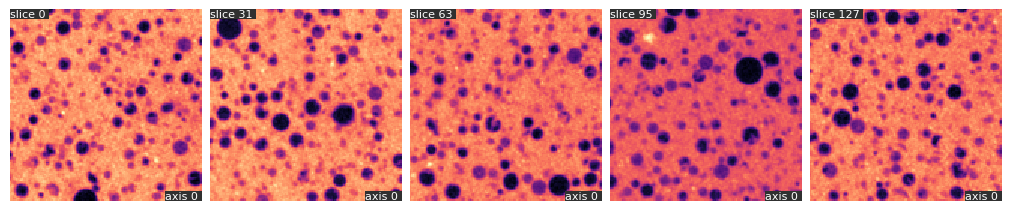

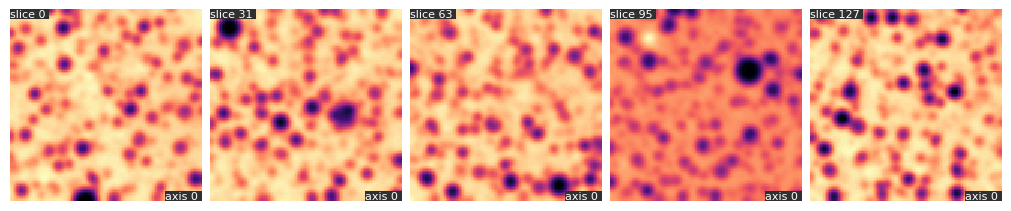

In [20]:
# Import 3D volume of cement
vol = qim3d.examples.cement_128x128x128

# Visualize slices of the original cement volume
fig = qim3d.viz.slices_grid(vol, num_slices = 5, display_figure=True)

# Apply Gaussian filter to the cement volume
vol_filtered = qim3d.filters.gaussian(vol, sigma = 2)

# Visualize slices of the filtered cement volume
fig = qim3d.viz.slices_grid(vol_filtered, num_slices = 5, display_figure=True)

Next the blob detection method is applied on the filtered volume to generate a binary mask of the volume, which can be used to compute local thickness

In [ ]:
vol_blobs, vol_mask = qim3d.detection.blobs(
    vol,
    min_sigma=1,
    max_sigma=8,
    threshold=0.001,
    overlap=0.1,
    background="bright"
    )

# Compute the local thickness of cement (input: binary mask)
lt_cement = qim3d.processing.local_thickness(vol_mask, visualize = True, axis = 0)

Bright background selected, volume will be inverted.


interactive(children=(IntSlider(value=64, description='Slice index', layout=Layout(width='450px'), max=127), O…